# Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
# Warnings filtering
import warnings
warnings.filterwarnings("ignore")

# Importing The Dataset

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 98% 598M/612M [00:06<00:00, 103MB/s] 
100% 612M/612M [00:06<00:00, 99.7MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

In [ ]:
df1 = pd.read_csv('Train.csv')

## Exploring the dataset

In [ ]:
df1.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [ ]:
# Initialize an empty list for data and labels
data = []
labels = []
classes = 43
cur_path = os.getcwd()
for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image_path = os.path.join(path, a)  # Construct the full image path using os.path.join
            pil_image = Image.open(image_path)  # Use a separate variable for PIL Image
            pil_image = pil_image.resize((30, 30))
            image = np.array(pil_image)  # Convert the PIL Image to a NumPy array
            data.append(image)
            labels.append(i)
        except Exception as e:
            print("Error loading image:", image_path)
            print("Error:", e)
            continue  # Continue with the next iteration

# Create NumPy arrays from the lists
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)


(39209, 30, 30, 3) (39209,)


# Showing The Images:

In [ ]:
def show_image(image_data, labels, index):
    plt.figure(figsize=(3, 3))
    plt.imshow(image_data[index])
    plt.title(f"Label: {labels[index]}")
    plt.axis('off')
    plt.show()

# Usage example:
index_to_show = 10  # Replace this with the desired index
show_image(data, labels, index_to_show)


# Splitting The Dataset

In [ ]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [ ]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

#Building the model

In [ ]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [ ]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 194s 194ms/step - loss: 1.8245 - accuracy: 0.5418 - val_loss: 0.3430 - val_accuracy: 0.9146
Epoch 2/15
981/981 [==============================] - 185s 188ms/step - loss: 0.5850 - accuracy: 0.8360 - val_loss: 0.1602 - val_accuracy: 0.9637
Epoch 3/15
981/981 [==============================] - 185s 189ms/step - loss: 0.3865 - accuracy: 0.8900 - val_loss: 0.1230 - val_accuracy: 0.9709
Epoch 4/15
981/981 [==============================] - 184s 187ms/step - loss: 0.3164 - accuracy: 0.9111 - val_loss: 0.1496 - val_accuracy: 0.9616
Epoch 5/15
981/981 [==============================] - 188s 192ms/step - loss: 0.2790 - accuracy: 0.9238 - val_loss: 0.0676 - val_accuracy: 0.9814
Epoch 6/15
981/981 [==============================] - 182s 186ms/step - loss: 0.2462 - accuracy: 0.9324 - val_loss: 0.0702 - val_accuracy: 0.9800
Epoch 7/15
981/981 [==============================] - 179s 183ms/step - loss: 0.2489 - accuracy: 0.9327 - val_loss: 0.0704 -

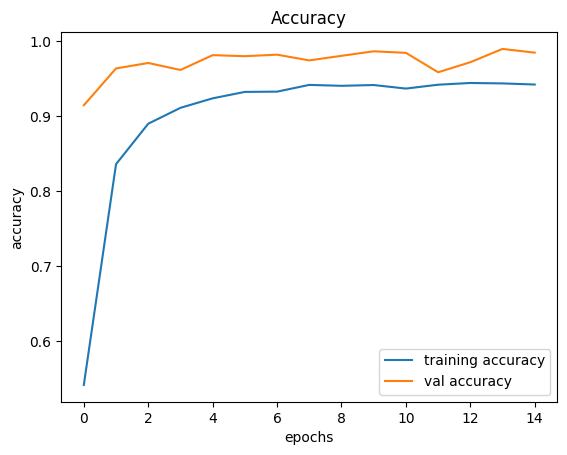

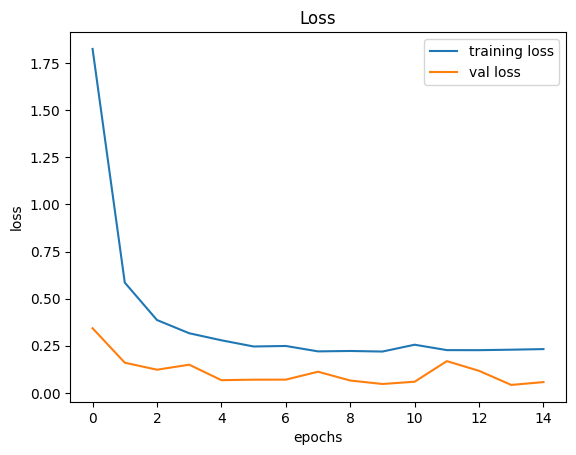

In [ ]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#Testing the Accuracy on the Test dataset

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model

# Load test data
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

# Process images and make predictions
data = []
for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30))
    data.append(np.array(image))
X_test = np.array(data)
pred_probs = model.predict(X_test)
pred_labels = np.argmax(pred_probs, axis=1)  # Get the class labels with highest probability

# Calculate accuracy
accuracy = accuracy_score(labels, pred_labels)
print("Accuracy:", accuracy)

# Save the model (optional)
model.save('traffic_classifier.h5')


395/395 [==============================] - 19s 47ms/step
Accuracy: 0.9518606492478227
